# The Banana Project

The goal of this project is tu use a [Deep Q Network algorithm](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf) architecture in order to train an agent to play the Banana game provided in the [Deep Reinforcement Learning](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893?utm_source=gsem_brand&utm_medium=ads_n&utm_campaign=2045115106_c&utm_term=77922608568_nam&utm_keyword=deep%20reinforcement%20learning%20udacity_e&gclid=EAIaIQobChMI_7_j6NWj5QIVhZ-zCh1z-wS1EAAYAiAAEgLjp_D_BwE) Udacity course.

The final model will finally use the advantages of a [Double Q Learning](https://arxiv.org/abs/1509.06461) architecture.

The game is a simple 3D area (built using [Unity Machine Learning Agents](https://unity3d.com/machine-learning)) where the player can choose between 4 actions (move forward/backward, turn left/right) to collect yellow Bananas (reward of +1) and avoid blue Bananas (reward of -1).

### The Game

Possible Actions:

- 0 - move forward.
- 1 - move backward.
- 2 - turn left.
- 3 - turn right.

The task is episodic and the task is considered succeeded if the agent gets an average score of +13 over 100 consecutive episodes.

### Setting up the environment

This environment has been built using [Unity Machine Learning Agents](https://unity3d.com/machine-learning). The environment can be downloaded using one of the following links:

- [Linux](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
- [Mac OSX](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
- [Windows (32-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)
- [Windows (64-bit](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)

Main required librairies:                

| Library | Version |
| :--------|--------:|
| matplotlib | 3.1.1|
| numpy | 1.17.2 |
| python | 3.6.7 |
| pytorch | 1.3.0 |

## The Solution

For this problem, an RNN has been used in order to have an idea of the movement in the 3D area. 

<i>Note : </i> This wouldn't be necessary for that problem since the only movements are from the agent itself (therefore known action) and Bananas falling from the sky (always falling exactly along the same axis), but I've been able to achieve fair results using a Gated Recurrent Unit and stayed with this architecture in order to be ready for more complexed data. For example in the original DQN paper, 4 frames have been used before the CNN to let the model have a sense of the movements. 

### The main files

| Files | Description |
| :--------|:--------|
| Report.ipynb | The main Jupyter Notebook to train and test the agent |
| models.py | Contains the RNN model used by the agent to model the Q function |
| dqn_agent.py | Contains the double Q learning agent |
| train_dqn.py | Implement the function to train the DQN agent  |

### The Untrained Agent

![Agent at Episode 1](./img/e1.gif)

### Training the Agent

#### Required librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dqn_agent import Agent
from train_dqn import DeepQNetwork

from unityagents import UnityEnvironment
env = UnityEnvironment(file_name=r".\Banana")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#### Settings and hyperparameters

The model will be trained using an Adam optimizer and an MSE Loss function. The GRU will have onelayer per frame used (defined as repeat_frames below) and the hidden_size equal to the state size (37). Other hyperparameters used are defined and explained below.

In [2]:
batch_size = 64         # Batch size for training neural network
repeat_frames = 2       # Number of consecutive frames with the same action, used as inputs to the neural network
gamma = 0.99            # Discount factor for future rewards
buffer_size = 100000    # Memory buffer size
lr = 1e-3               # Learning rate of the neural network
update_every = 4        # Soft update of target parameters time
tau = 1e-3              # Soft update of target parameters

n_episodes = 2000       # Number of episodes on which to train
max_t = int(1e9)        # Maximum number of frames actions
eps_start = 1.0         # Exploration at the beginning
eps_end = 0.01          # Exploration at the end
eps_decay = 0.995       # Decay of the exploration at every episodes
show_every = 100        # When to display fixed reward
save_every = 200        # When to save neural network weights

score_for_success = 13. # Score to achieve to stop training

#### Creating the agent and training on the environment

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_space = brain.vector_action_space_size
state_space = len(env_info.vector_observations[0])
print('Action space:', action_space)
print('States space:', state_space)

Action space: 4
States space: 37


In [4]:
agent = Agent(state_space=state_space, action_space=action_space, batch_size=batch_size, gamma=gamma, buffer_size=buffer_size, lr=lr, repeat_frames=repeat_frames, update_every=update_every, tau=tau, seed=0)

In [5]:
scores = DeepQNetwork(env, agent, score_for_success, n_episodes=n_episodes, max_t=max_t, eps_start=eps_start, eps_end=eps_end, eps_decay=eps_decay, show_every=show_every, repeat_frames=repeat_frames, save_every=save_every)

Episode  100/2000 | Average Score:  0.33 | Epsilon : 0.61 | Elapsed time : 0h 02min 57sec | Remaining time : 0h 55min 57sec
Episode  200/2000 | Average Score:  2.26 | Epsilon : 0.37 | Elapsed time : 0h 06min 01sec | Remaining time : 0h 54min 11sec
Episode  300/2000 | Average Score:  7.08 | Epsilon : 0.22 | Elapsed time : 0h 09min 14sec | Remaining time : 0h 52min 20sec
Episode  400/2000 | Average Score:  8.54 | Epsilon : 0.13 | Elapsed time : 0h 12min 31sec | Remaining time : 0h 50min 03sec
Episode  500/2000 | Average Score: 10.39 | Epsilon : 0.08 | Elapsed time : 0h 15min 50sec | Remaining time : 0h 47min 29sec
Episode  600/2000 | Average Score: 12.48 | Epsilon : 0.05 | Elapsed time : 0h 19min 07sec | Remaining time : 0h 44min 35sec
Episode  683/2000 | Average Score: 13.03 | Epsilon : 0.03 | Elapsed time : 0h 21min 52sec | Remaining time : 0h 42min 09sec

Task succesfully completed in 683 episodes!


Plot Learning curve

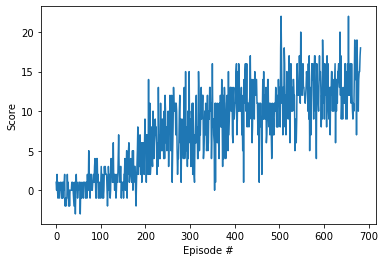

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### The 683rd Episode Agent

![Agent at Episode 683](./img/e683.gif)

## Ideas for Future Work

Even if the model successfully gets an average reward of +13 over 100 consecutive episodes, in some of those episodes the agent gets stuck in loops. Indeed, if on a given state the reward is to go in a direction and the next best action in that new state (according to the model) is to go back to the previous position, the agent can get stuck between those 2 postions.

If the epsilon (random action probability) is higher than 0, then the agent will eventually get out of this cycle, but this isn't efficient.

Here are some ideas of future work that could be considered to avoid or minimize the occurences of those situations:
1. Have another model guess/imagine what will be the next action in the next state and if this action would reverse the previous, try the second best one.
2. Have a last action memory and if the next action would reverse the previous one, try the second best one.
3. Add noise to the output action in order to sometime select another one than the best while avoiding the worst one. For example adding a 5% noise on the model output before the argmax function.